In [1]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import manifold, decomposition, linear_model, ensemble, neighbors, cross_validation
import sklearn
from sklearn import pipeline, preprocessing, feature_extraction
import xgboost as xgb
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, auc, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm

from sklearn.preprocessing import StandardScaler

%matplotlib inline
%pylab inline

/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [13]:
X_train = pd.read_csv("data/train.csv")
X_test = pd.read_csv("data/test.csv")

### Информация 

In [12]:
print(X_train.shape)
print(X_test.shape)

(404290, 6)
(2345796, 3)


In [4]:
np.concatenate((X_test.question1.unique(),X_test.question2.unique()), axis=0).shape

(4438409,)

In [10]:
np.concatenate((X_train.question1.unique(),X_train.question2.unique()), axis=0).shape

(589632,)

In [9]:
np.concatenate((X_train.question1.unique(),X_train.question2.unique(),
                X_test.question1.unique(),X_test.question2.unique()), axis=0).shape

(5028041,)

In [11]:
4438409+589632

5028041

### Все вопросы

In [14]:
questions = np.concatenate((X_train.question1,X_train.question2,
                X_test.question1,X_test.question2), axis=0)

In [15]:
questions = pd.DataFrame(questions)
questions.columns = ['q1']
cnt = pd.DataFrame(questions.groupby('q1')['q1'].count())
cnt['question1'] = cnt.index
cnt.index = range(len(cnt))
cnt.columns = ['q1', 'question1']
X_train = pd.merge(X_train, cnt, on="question1", how="left")
cnt.columns = ['q2', 'question2']
X_train = pd.merge(X_train, cnt, on="question2", how="left")

In [ ]:
cnt.columns = ['q1', 'question1']
X_test = pd.merge(X_test, cnt, on="question1", how="left")
cnt.columns = ['q2', 'question2']
X_test = pd.merge(X_test, cnt, on="question2", how="left")

In [12]:
X_test

,test_id,question1,question2,q1,q2,raz
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,1.044053e-07,1.044053e-07,0.000000e+00
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,2.088105e-07,2.088105e-07,0.000000e+00
2,2,What but is the best way to send money from Ch...,What you send money to China?,1.044053e-07,1.044053e-07,0.000000e+00
3,3,Which food not emulsifiers?,What foods fibre?,1.044053e-07,1.044053e-07,0.000000e+00
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,1.044053e-07,1.044053e-07,0.000000e+00
5,5,How are the two wheeler insurance from Bharti ...,I admire I am considering of buying insurance ...,1.044053e-07,1.044053e-07,0.000000e+00
6,6,How can I reduce my belly fat through a diet?,How can I reduce my lower belly fat in one month?,2.923347e-06,3.132158e-06,2.088105e-07
7,7,"By scrapping the 500 and 1000 rupee notes, how...",How will the recent move to declare 500 and 10...,1.044053e-07,1.044053e-07,0.000000e+00
8,8,What are the how best books of all time?,What are some of the military history books of...,1.044053e-07,1.044053e-07,0.000000e+00
9,9,After 12th years old boy and I had sex with a ...,Can a 14 old guy date a 12 year old girl?,1.044053e-07,2.088105e-07,1.044053e-07


In [ ]:
X_test['q1'] = X_test['q1'].apply(lambda x: x * 1.0 / ( len(questions)))
X_test['q2'] = X_test['q2'].apply(lambda x: x * 1.0 / ( len(questions)))

X_train['q1'] = X_train['q1'].apply(lambda x: x * 1.0 / ( len(questions)))
X_train['q2'] = X_train['q2'].apply(lambda x: x * 1.0 / ( len(questions)))

In [ ]:
X_train['raz'] = abs(X_train['q1'] - X_train['q2'])

/home/fao3864/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


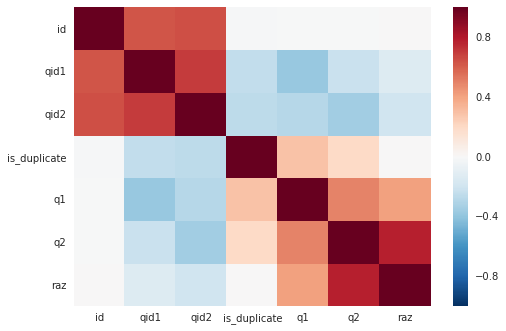

In [8]:

import seaborn as sns
CorrKoef = X_train.corr()
#pylab.figure(figsize=(50, 25))
sns.heatmap(CorrKoef, annot=False)

In [9]:
X_test['raz'] = abs(X_test['q1'] - X_test['q2'])

/home/fao3864/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


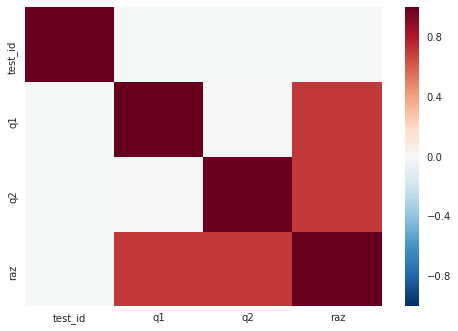

In [10]:

import seaborn as sns
CorrKoef = X_test.corr()
#pylab.figure(figsize=(50, 25))
sns.heatmap(CorrKoef, annot=False)

In [86]:
X_train = X_train.ix[:, ['q1', 'q2']]
X_test = X_test.ix[:, ['q1', 'q2']]

In [87]:
X_train.to_csv("data/freq_train.csv", index=None)
X_test.to_csv("data/freq_test.csv", index=None)